In [1]:
import sys,os
sys.path.append(os.path.dirname(os.getcwd()))
from maesters_of_clim import Climate_Maester
from datetime import datetime

## Climate Index History

<AxesSubplot:xlabel='month'>

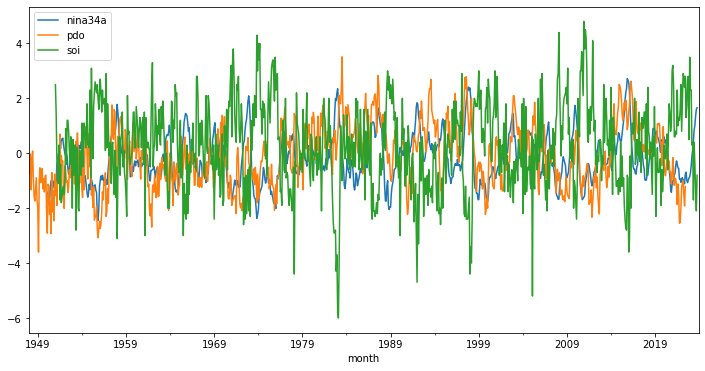

In [2]:
from maesters_of_clim import Climate_Maester
c = Climate_Maester(['nina34a', 'pdo', 'soi'], 'psl')
df = c.history()
df.set_index('month').plot(figsize=(12,6))

## Climate Forecast

In [5]:
c = Climate_Maester('enso', 'iri')
d = datetime(2023, 10, 1)
iridf = c.forecast(pred_at=d)
cpcdf = c.forecast(pred_at=d, source='cpc')
detaildf = c.forecast(pred_at=d, source='detail')

In [6]:
iridf

,Season,LaNina,Neutral,ElNino,Release_Month,Forecast_Season
0,OND,0,0,100,2023-10,2023-11
1,NDJ,0,0,100,2023-10,2023-12
2,DJF,0,0,100,2023-10,2024-01
3,JFM,0,1,99,2023-10,2024-02
4,FMA,0,5,95,2023-10,2024-03
5,MAM,0,18,82,2023-10,2024-04
6,AMJ,1,44,55,2023-10,2024-05
7,MJJ,8,58,34,2023-10,2024-06
8,JJA,22,56,22,2023-10,2024-07


In [7]:
cpcdf

,Season,LaNina,Neutral,ElNino,Release_Month,Forecast_Season
0,SON,0,0,100,2023-10,2023-10
1,OND,0,0,100,2023-10,2023-11
2,NDJ,0,0,100,2023-10,2023-12
3,DJF,0,1,99,2023-10,2024-01
4,JFM,0,3,97,2023-10,2024-02
5,FMA,0,9,91,2023-10,2024-03
6,MAM,0,20,80,2023-10,2024-04
7,AMJ,1,38,61,2023-10,2024-05
8,MJJ,6,53,41,2023-10,2024-06


In [8]:
detaildf

,Season,AUS-ACCESS,BCC_CSM11m,CMC CANSIP,COLA CCSM4,CS-IRI-MM,DWD,ECMWF,GFDL SPEAR,IOCAS ICM,...,CSU CLIPR,IAP-NN,NTU CODA,UCLA-TCD,UW PSL-CSLIM,UW PSL-LIM,"Average, Statistical models","Average, All models",Release_Month,Forecast_Season
0,OND,2.03,2.07,1.89,1.51,1.90,1.76,1.98,1.85,1.76,...,1.73,1.59,1.77,1.84,1.73,1.75,1.567,1.777,2023-10,2023-11
1,NDJ,2.27,2.36,1.93,1.47,1.97,1.90,2.09,2.00,1.76,...,1.56,1.47,1.85,1.79,1.64,1.75,1.519,1.836,2023-10,2023-12
2,DJF,2.43,2.38,1.89,1.39,1.88,1.91,2.09,2.02,1.74,...,1.40,1.24,1.83,1.63,1.42,1.65,1.371,1.769,2023-10,2024-01
3,JFM,2.40,2.16,1.78,1.27,1.69,1.83,1.94,1.88,1.59,...,1.23,0.95,1.52,1.38,1.13,1.47,1.154,1.570,2023-10,2024-02
4,FMA,,1.82,1.52,1.15,1.41,,1.70,1.63,1.34,...,0.98,0.62,1.28,1.08,0.80,1.20,0.899,1.203,2023-10,2024-03
5,MAM,,1.50,1.11,0.95,1.13,,,1.34,0.99,...,0.72,0.26,1.22,0.78,0.50,0.91,0.655,0.867,2023-10,2024-04
6,AMJ,,1.25,0.58,0.81,,,,0.98,0.63,...,0.47,-0.08,1.05,0.50,0.24,0.62,0.417,0.561,2023-10,2024-05
7,MJJ,,1.10,0.04,0.61,,,,0.61,0.31,...,0.26,-0.40,0.80,0.27,0.03,0.37,0.170,0.277,2023-10,2024-06
8,JJA,,1.04,-0.50,,,,,0.33,0.05,...,0.06,-0.67,0.46,0.07,-0.14,0.14,-0.057,0.003,2023-10,2024-07


## ENSO Event calc

In [10]:
from maesters_of_clim.analysis import enso_event
df['enso_event'] = enso_event(df, column='nina34a', temp=0.5, months=5)
df[~df['enso_event'].isna()]

,month,nina34a,pdo,soi,enso_event
28,1950-05-01,-1.75,-2.23,NaN,-1.0
29,1950-06-01,-1.27,-1.77,NaN,-1.0
30,1950-07-01,-1.01,-2.93,NaN,-1.0
31,1950-08-01,-0.97,-0.70,NaN,-1.0
32,1950-09-01,-0.98,-2.14,NaN,-1.0
...,...,...,...,...,...
897,2022-10-01,-0.99,NaN,2.8,-1.0
898,2022-11-01,-0.90,NaN,0.5,-1.0
899,2022-12-01,-0.85,NaN,3.5,-1.0
900,2023-01-01,-0.71,NaN,2.3,-1.0
